# Time Series Predictions with Facebook Prophet

Forecasting is a data science task that is central to many activities within an organization. For instance, large organizations must engage in capacity planning to efficiently allocate scarce resources and goal setting in order to measure performance relative to a baseline. 

These are only some of the conceivable predictions of future trends that might be useful:
* The number of servers that an online service will need next year
* The demand for a grocery product at a supermarket on a given day
* The tomorrow closing price of a tradable financial asset

Producing high quality forecasts is not an easy problem for either machines or for most analysts. 

There are quite a few different methods to predict future trends, for example, ARIMA, ARCH, regressive models, neural networks.

According to the [article](https://research.fb.com/prophet-forecasting-at-scale/) by Facebook Research, the motivation for work building Facebook Prophet was to make it easier for experts and non-experts to make high quality forecasts that keep up with demand.

Before diving deeper into Prophet, let's quickly review some of time series methods. 

### Classical time series methods

* Based on formal structural assumptions AR (autoregressive), MA (moving average) 
* Correct model/parameter choice generally non-trivial (but important) 

### Machine Learning methods

* Avoids structural assumptions 
* No decomposition of components
* Uncertainty estimates may be hard to get
* How hyperparameters will affect specfic weaknesses not clear 

### What Prophet brings

* Scale
* Decomposible additive components
* Straightforward parameters
* Moderate structural formalism 
* Uncertainty 

### How it works 

Technology

* Bayesian estimation of additive model
* Fit with [Stan](http://mc-stan.org) 
* [MAP optimization](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation)
* Interface with Python or R

Prophet is a procedure for forecasting time series data. It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. It works best with daily periodicity data with at least one year of historical data. Prophet is robust to missing data, shifts in the trend, and large outliers.

Prophet is an additive regression model that incldues a number of highly advanced, intelligent forecasting methods, including changepoint analysis:

* A piecewise linearor logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
* A yearly seasonal component modeled using Fourier series. 
* A weekly seasonal component using dummy variables.
* A user-provided list of important holidays.

Prophet is built around a **generalized additive model (GAM)** (Hastie & Tibshirani 1987). This type of model is more complex than a simple linear model, which generally results in improved model performance.

Prophet uses a decomposable time series model (Harvey & Peters 1990).
The three components: 
1. Trend
2. Seasonality
3. Holidays

Are combined in the following equation:


`y(t) = g(t) + s(t) + h(t) + ϵ(t)`,

where:

`g(t)` is the trend function that models non-periodic changes in the value of the time series

`s(t)` is the trend function which models non-periodic changes in the value of the time series (e.g. weekly and yearly seasonality)

`h(t)` represents the effects of holidays which occur on potentially irregular schedules over one or more days.

The error term `ϵ(t)` represents any changes that are not accomodated by the model. 

e.g. *trend + seasonality + holiday*

Below, we will consider some important properties of these model components.

#### Trend

For growth forecasting, the core component of the data generating process is a model for how the population has grown and how it is expected to continue growing.

The Prophet library implements two possible trend models for `g(t)`:

The **first** one is called Nonlinear, Saturating Growth. It is represented in the form of the logistic growth model:

$$ \frac{C}{1+e^{-k(t-m)}} $$

where:   

* C is the carrying capacity (that is the curve’s maximum value).   
* k is the growth rate (which represents “the steepness” of the curve).   
* m is an offset parameter.   

This logistic equation allows modelling non-linear growth with saturation, that is when the growth rate of a value decreases with its growth. One of the typical examples would be representing the growth of the audience of an application or a website.

The **second** trend model is a simple Piecewise Linear Model with a constant rate of growth. It is best suited for problems without saturating growth.

#### Seasonality

Business time series often have multi-period seasonality as a result of the human behaviors they represent. For instance, a 5-day work week can produce effects on a time series that repeat each week, while vacation schedules and school breaks can produce effects that repeat each year. To fit and forecast these effects we must specify seasonality models that are periodic functions of t.

The seasonal component `s(t)` provides a flexible model of periodic changes due to weekly and yearly seasonality.

Weekly seasonal data is modeled with dummy variables for the days of the week. 

Yearly seasonality model in Prophet relies on Fourier series.

#### Holidays and Events

Holidays and events provide large, somewhat predictable shocks to many business time series and often do not follow a periodic pattern, so their effects are not well modeled by a smooth cycle. For instance, Thanksgiving in the United States occurs on the fourth Thursday in November. The Super Bowl, one of the largest televised events in the US, occurs on a Sunday in January or February that is difficult to declare programmatically. Many countries around the world have major holidays that follow the lunar calendar. The impact of a particular holiday on the time series is often similar year after year, so it is important to incorporate it into the forecast.

The component `h(t)` represents predictable abnormal days of the year including those on irregular schedules.

To utilize this feature, the analyst needs to provide a custom list of events.

#### Error

The error term `ϵ(t)` represents information that was not reflected in the model. Usually it is modeled as normally distributed noise.



#### Summary

In effect, Prophet frames the forecasting problem as a curve-fitting exercise, which is inherently different from time series models that explicitialy account for the temporal dependence structure in the data.

Compared to the ARIMA model, this formulation provides a number of practical advantages: 

1. Flexibility - we can easily accomodate seasonality with multiple periods and let the analyst make different assumptions about trends.

2. Unlike with ARIMA models, the measurements do not need to be regularly spaced, and we do not need to interpolate missing values e.g. from removing outliers.
3. Fitting is very fast, allowing the analyst to interactively explore many model specifications
4.  The forecasting model has easily interpretable parameters that can be changed by the analyst to impose assumptions on the forecast. Moreover, analysts typically do have experience with regression and are easily able to extend the model to include new components.

### Prophet Benchmarking

For a detailed description of the model and algorithms behind Prophet refer to the paper [“Forecasting at scale”](https://peerj.com/preprints/3190/) by Sean J. Taylor and Benjamin Letham.

The authors also compared their library with several other methods for time series forecasting. They used [Mean Absolute Percentage Error (MAPE)](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) as a measure of prediction accuracy. In this research, Prophet has shown substantially lower forecasting error than the other models.

## Where Prophet Shines

Not all forecasting problems can be solved by the same procedure. Prophet is optimized for the business forecast tasks
encountered at Facebook, which typically have any of the following characteristics:

1. hourly, daily, or weekly observations with at least a few months (preferably a year) of history
2. strong multiple “human-scale” seasonalities: day of week and time of year
3. important holidays that occur at irregular intervals that are known in advance (e.g. the Super Bowl)
4. a reasonable number of missing observations or large outliers
5. historical trend changes, for instance due to product launches or logging changes
6. trends that are non-linear growth curves, where a trend hits a natural limit or saturates

    
<br>

The following diagram illustrates a schematic view of the analyst-in-the-loop approach to forecasting at scale, which the prophet Paper claims best makes use of human and automated tasks:

<img src="https://research.fb.com/wp-content/uploads/2017/02/image-2.png" style="height:400px">

We start by **modeling** the time series using a flexible specification that has a straightforward human interpretation for each of the parameters. 

We then **produce forecasts** for this model and a set of reasonable baselines across a variety of historical simulated forecast dates, and **evaluate** forecast performance. 

When there is poor performance or other aspects of the forecasts warrant human intervention, we **flag** these **potential problems** to a human analyst in a prioritized order. 

The analyst can then **inspect** the forecast and potentially **adjust** the model based on this feedback.

## Practice with Facebook Prophet

#### Installation 

To install Prophet, you can simply call: 

`$ pip install fbprophet`

Let’s import the modules that we will need, and initialize our environment:

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

import logging
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

logging.getLogger('fbprophet').setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

NOTE: 

The input to Prophet is always a dataframe with two labeled columns: `ds` and `y`.  The `ds` (datestamp) column must contain a date or datetime (either is fine, ideally `YYYY-MM-DD` for a date or `YYYY-MM-DD HH:MM:SS` for a timestamp). 
The `y` column must be numeric, and represents the measurement we wish to forecast.


## Example 1: Vodafone Wikipedia article daily page views

As an example, let's look at a time series of daily page views for the [Vodafone Wikipedia Page](https://en.wikipedia.org/wiki/Vodafone).  We scraped this data using the [Wikipedia PageView Analysis](https://tools.wmflabs.org/pageviews/).  The article daily visits provides a nice example because it illustrates some of Prophet's features, like multiple seasonality and changing growth rates. The CSV file is available [here](https://raw.githubusercontent.com/fellowship/tutorials/master/pageviews.csv).

First we'll import the data:

In [2]:
df = pd.read_csv('pageviews.csv')
df.head()

,Date,Vodafone
0,2015-07-01,2098
1,2015-07-02,2008
2,2015-07-03,1699
3,2015-07-04,1323
4,2015-07-05,1472


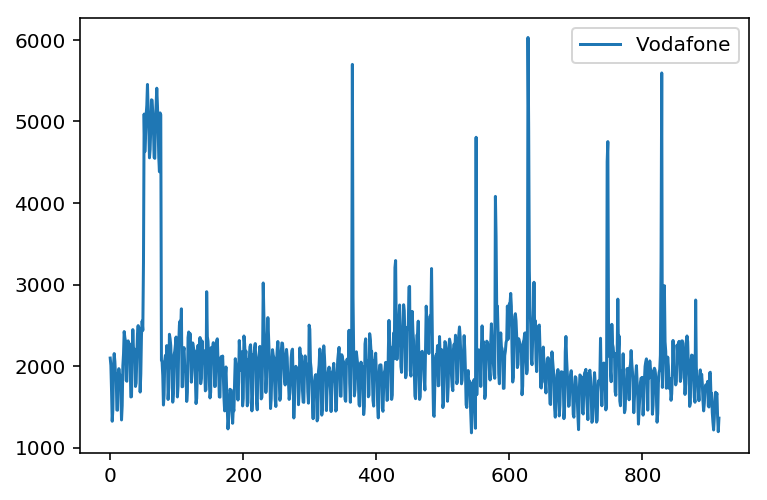

In [3]:
#plot data
df.plot();

**Note:** To use the `Prophet` package, we need to explictly label column headers as:
1. 'ds' (datestamp) must be of type `date` or `datetime` 
2. 'y' is a numeric that we want to predict

We need to log-transform the y variable to make it smoother.

In [4]:
#log data due to spikes
#rename columns to fit prophet's requirements
df['y'] = np.log(df['Vodafone'])
df['ds'] = df['Date']

df = df.drop(['Vodafone', 'Date'], axis=1)
df.head()

,y,ds
0,7.648740,2015-07-01
1,7.604894,2015-07-02
2,7.437795,2015-07-03
3,7.187657,2015-07-04
4,7.294377,2015-07-05


### Making a forecast

Now that we have the data in the expected format, we can start modeling.

Prophet's API is very similar to that of `sklearn`. First we create a model, then call the method `fit` and pass in the historical dataframe, and finally, make a forecast. 

In [5]:
#fit model
m = Prophet()   #create a new Prophet object
m.fit(df);      #call the fit method on the historical dataframe

Predictions are then made on a dataframe with a column `ds` containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe`. By default it will also include the dates from the history, so we will see the model fit as well. 

**Note**: The authors of the library generally advise to make predictions based on at least several months, ideally, more than a year of historical data. Luckily, in our case we have more than a couple of years of data to fit the model.

Using the helper method `Prophet.make_future_dataframe`, we create a dataframe which will contain all dates from the history and also extend into the future 

In [6]:
#forecast 365 days into future
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1276,2018-12-28
1277,2018-12-29
1278,2018-12-30
1279,2018-12-31
1280,2019-01-01


The `predict` method will assign each row in `future` a predicted value which it names `yhat`.  If you pass in historical dates, it will provide an in-sample fit. The `forecast` object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

In [7]:
# populate forecast 
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1276,2018-12-28,7.201614,5.936203,8.409176
1277,2018-12-29,7.013740,5.738273,8.199320
1278,2018-12-30,7.036632,5.754087,8.212210
1279,2018-12-31,7.278606,6.024094,8.471378
1280,2019-01-01,7.332459,5.997564,8.506163


In the resulting dataframe you can see many columns characterizing the prediction, including trend and seasonality components as well as their confidence intervals `yhat_lower` & `yhat_upper`. The forecast itself is stored in the `yhat column`.

### Plotting the forecast

The Prophet library has its own built-in tools for visualization that enable us to quickly evaluate the result.

Now that we have numerical forecasts for our `future` time period, we can plot the forecast by calling the `Prophet.plot` method and passing in our forecast dataframe:

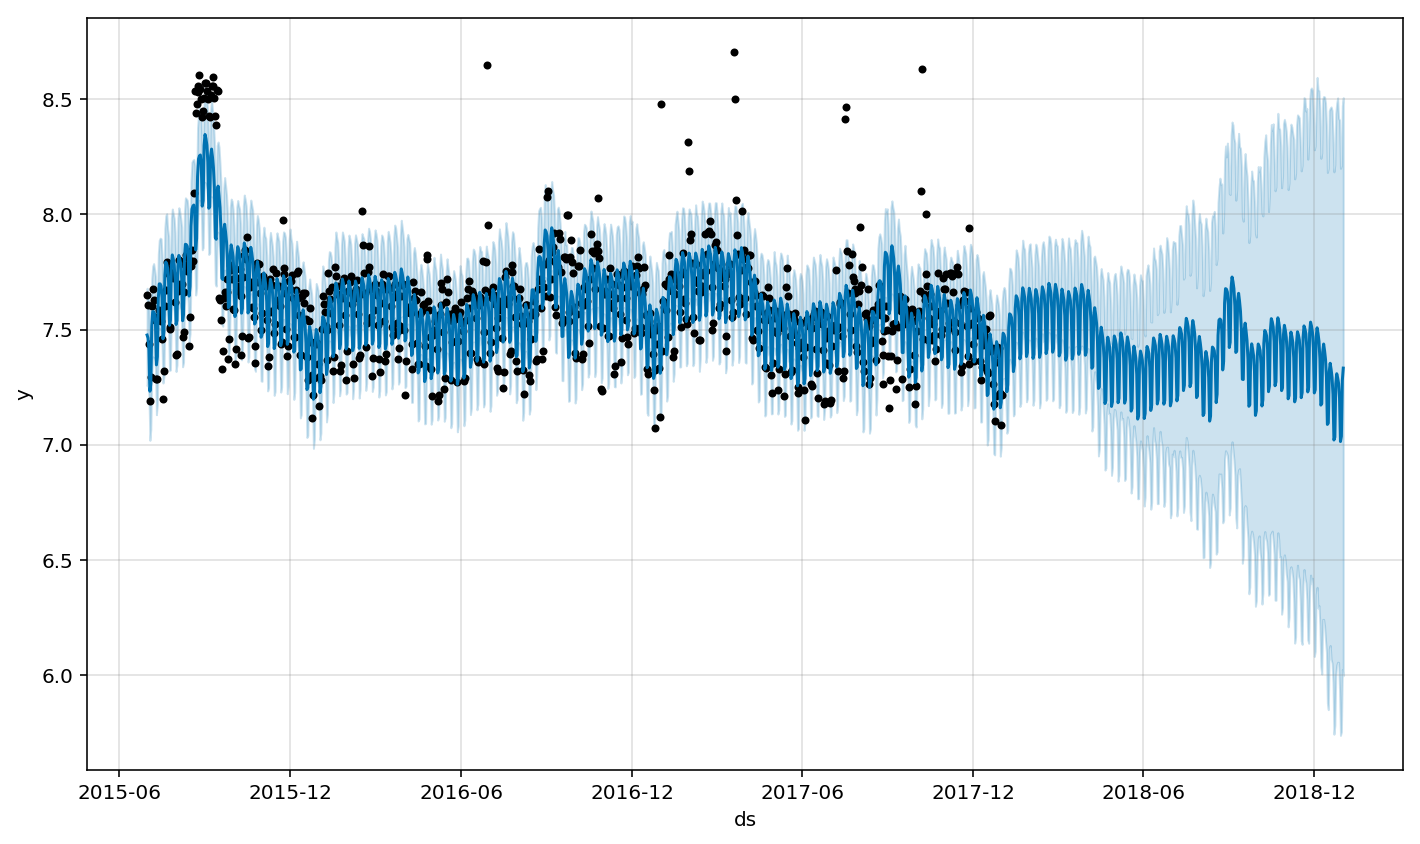

In [8]:
m.plot(forecast);

Note that the actual points are in black, and the prediction is in blue. 

This chart doesn’t look very informative. The only definitive conclusion that we can draw here is that the model treated many of the data points as outliers.

If we want to see the forecast components, we can use the `Prophet.plot_components` method. By default you'll see the trend, yearly seasonality, and weekly seasonality components of the time series.  

In addition, if you supply information about holidays and events to your model, they will also be shown in this plot.

Let’s try it out:


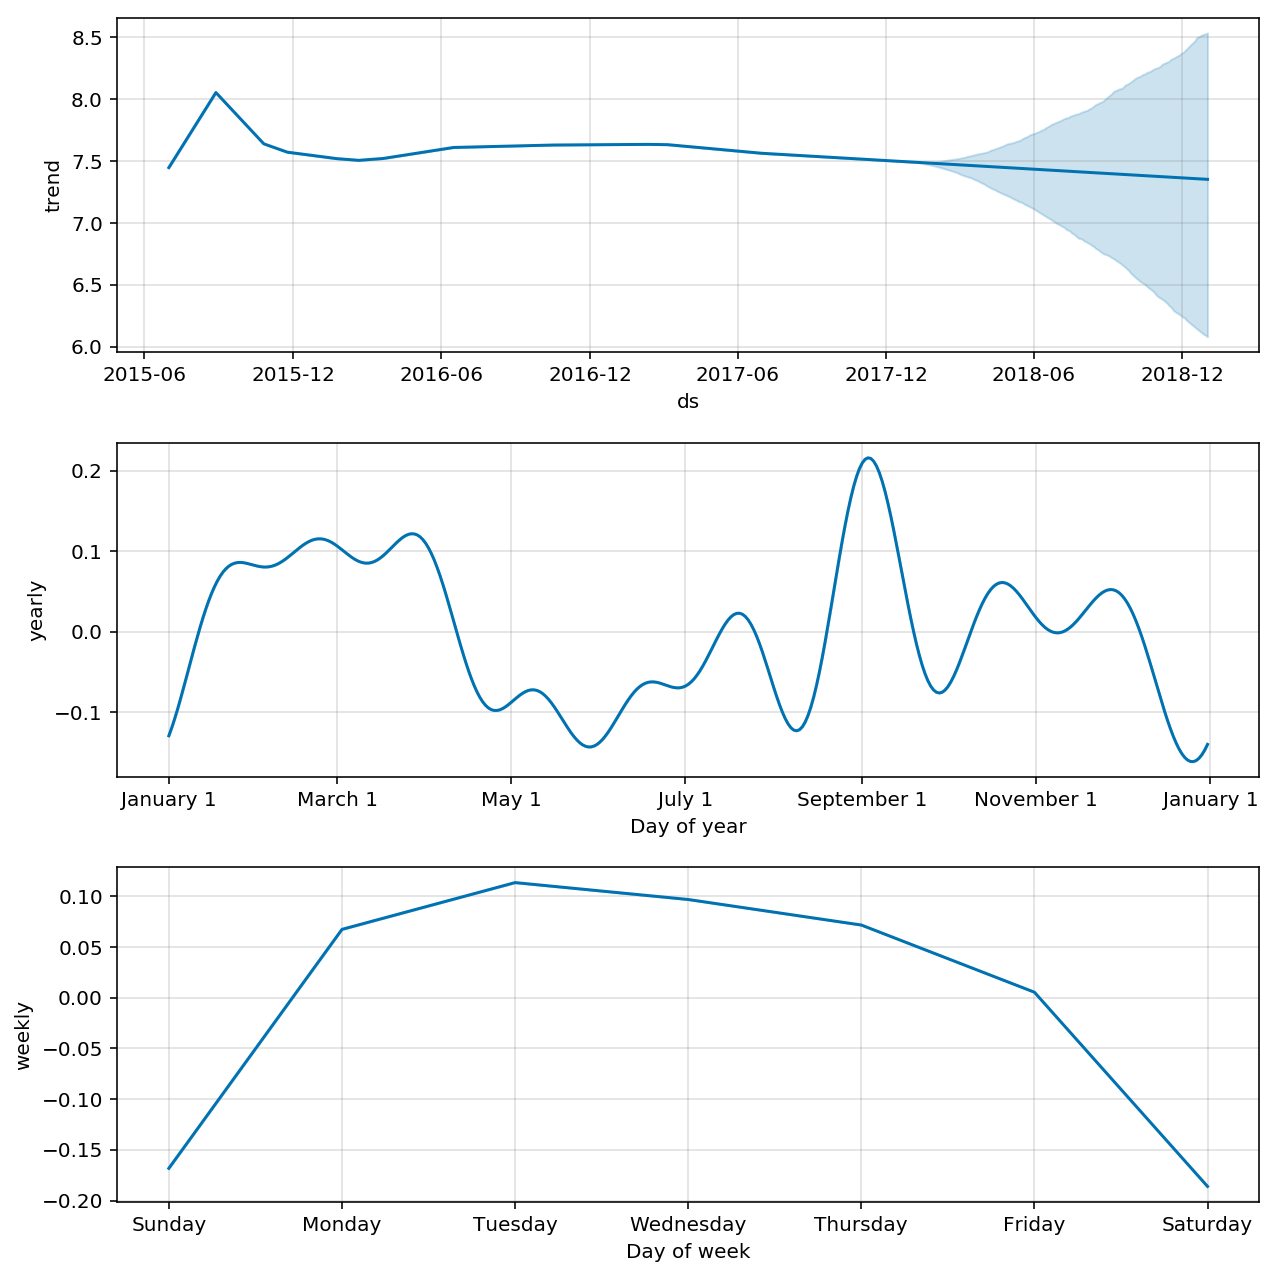

In [9]:
#plot individual components of forecast; trend, weekly/yearly seasonality
m.plot_components(forecast);

This plot clearly shows the yearly seasonality associated with browsing to Vodafone's wikipedia page (early September, and to a less extent, in the first quarter of the year), as well as the weekly seasonality: more visits during mid week than weekends. 

There seems to be a drop at the end of the year around Christmas and New Years' Eve. 

You can also notice the slight downward adjustment to the trend component. 

Now that we can see the individual components of the model.  
In general, the Generalized Additive Model is defined as:

`y(t) = g(t) + s(t) +h(t) +epsilon`  
e.g.    trend + seasonality + holiday

More details about the options available for each method are available in the docstrings, for example, via `help(Prophet)` or `help(Prophet.fit)`.

## Example 2: Monthly data

<br> 
While `Prophet` was designed primarily for daily data (for example, predicting metrics such as daily active users, or DAU), we can use it with weekly, monthly, or yearly data as well. However, it will perform best on daily data.

Let's use atmospheric data from the `statsmodels` library to forecast CO<sub>2</sub> concentrations using `Prophet`. 

In [10]:
# load CO2 concentration data
import statsmodels.api as sm
data = sm.datasets.co2.load_pandas().data

In [11]:
co2 = data
co2['ds'] = co2.index
co2.rename(columns={'co2':'y'}, inplace=True)
co2.tail()

,y,ds
2001-12-01,370.3,2001-12-01
2001-12-08,370.8,2001-12-08
2001-12-15,371.2,2001-12-15
2001-12-22,371.3,2001-12-22
2001-12-29,371.5,2001-12-29


In [12]:
#fit model
model = Prophet()
model.fit(co2);

**Note:** In addition to daily data, we can use `Prophet` to predict for different time periods by setting the freq paramenter of the `make_future_dataframe()` function. Use 'A' for annual, 'M' for monthly and 'W' for weekly data.

In [13]:
#forecast 15 years into future
future = model.make_future_dataframe(periods=120, freq ='M', include_history=True)
future.tail()

,ds
2399,2011-07-31
2400,2011-08-31
2401,2011-09-30
2402,2011-10-31
2403,2011-11-30


In [14]:
#populate forecast
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2399,2011-07-31,388.924117,376.504673,401.348553
2400,2011-08-31,386.962766,374.732778,399.504115
2401,2011-09-30,385.932003,373.392478,398.347125
2402,2011-10-31,386.831338,374.164858,399.769220
2403,2011-11-30,388.242076,375.643729,401.218647


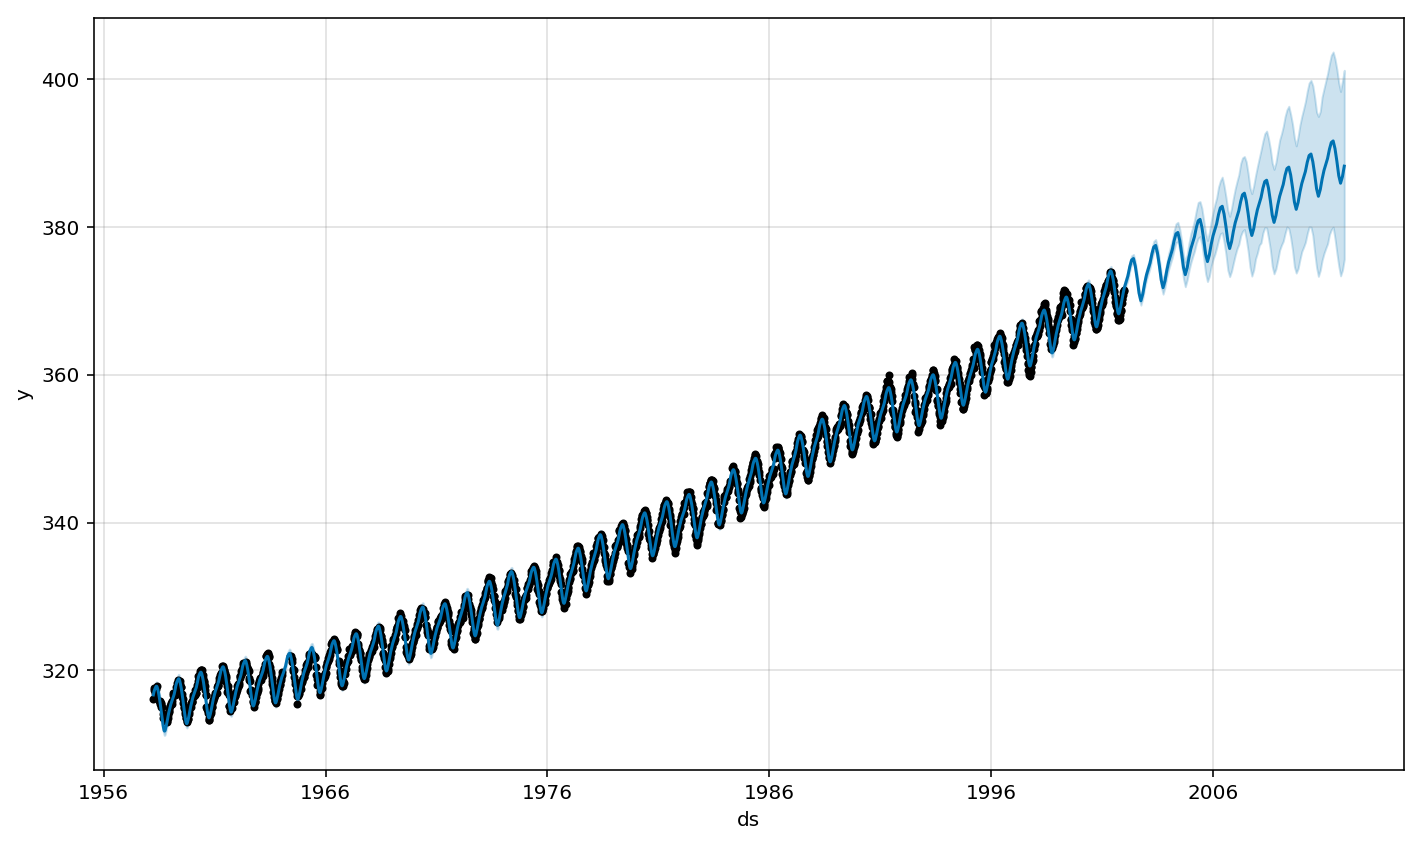

In [15]:
model.plot(forecast);

Once again, we can break down the forecast into components:

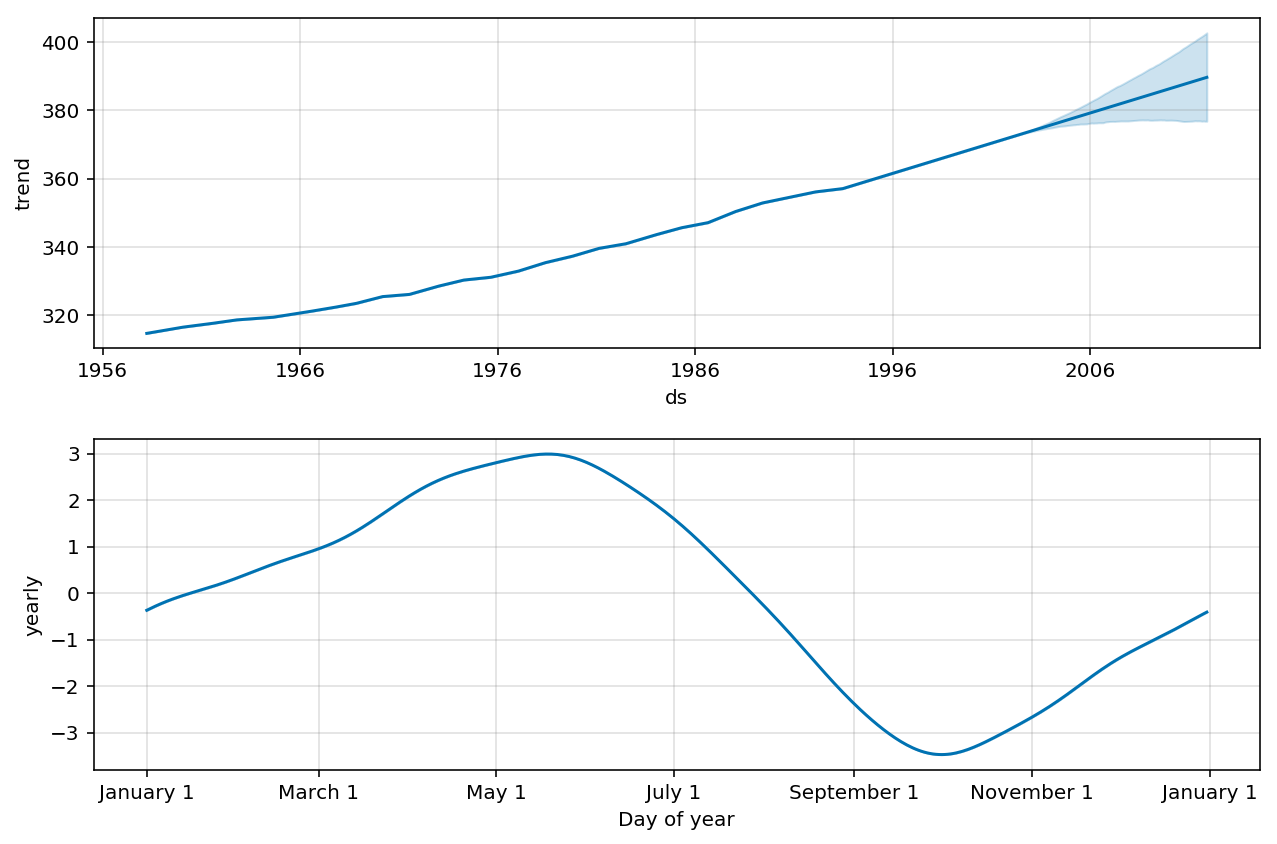

In [16]:
model.plot_components(forecast);

### Adding a threshold

Often times, our time series predictions will be limited by real-world constraints. For example, a social media platform has a maximum limit of all the people that are connected to the internet. This number of course, can change over time.  Facebook Prophet allows us to add a cap to the growth curve, and even change this cap over time by providing different values for each row of the cap column.

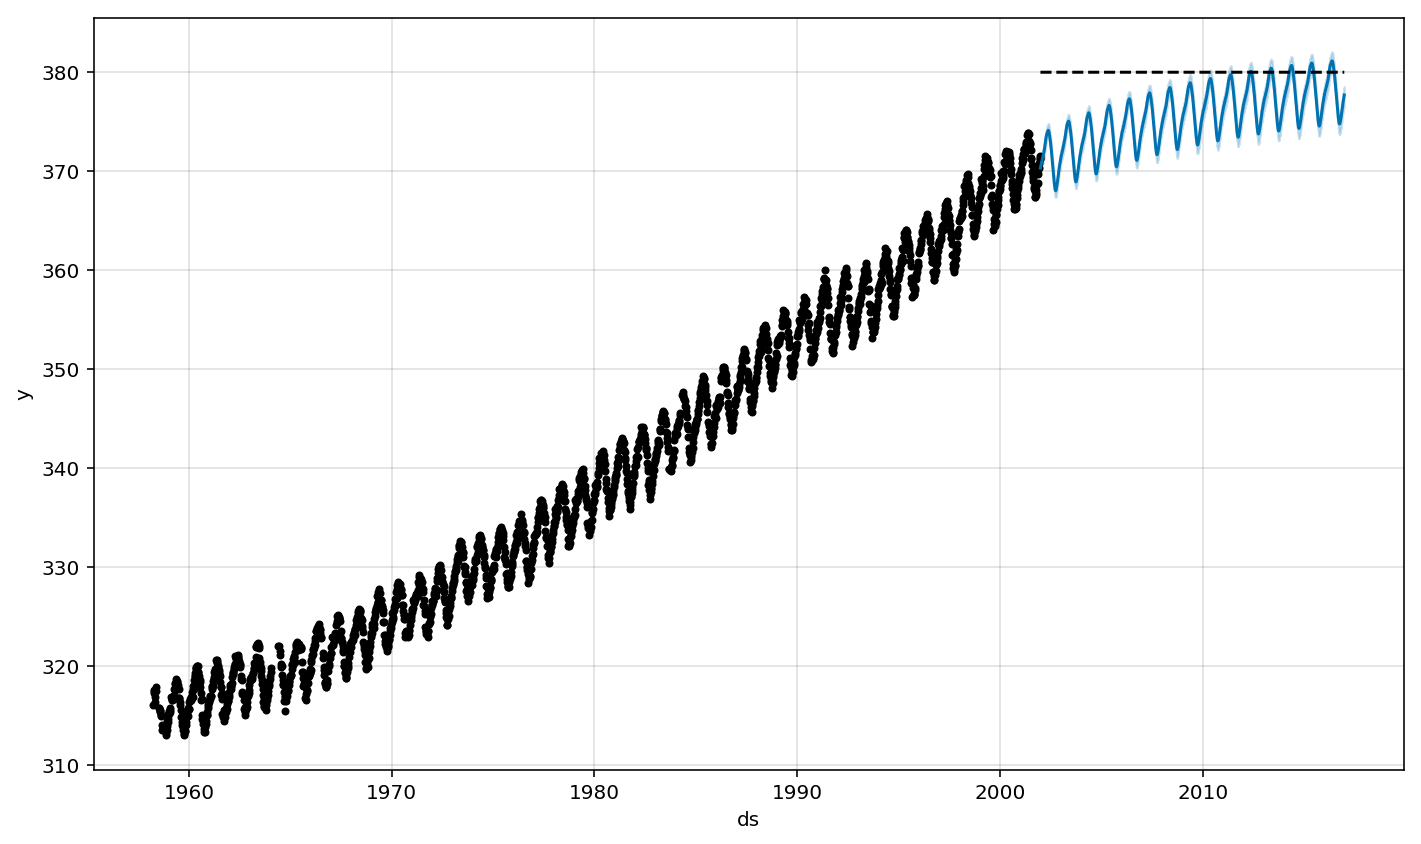

In [17]:
#we can add a cap to limit our theoretical growth
co2['cap'] = 380
m = Prophet(growth='logistic')
m.fit(co2);

# forecast 15 years into future with cap of 380
future = m.make_future_dataframe(periods=365*15, include_history=False)
future['cap'] = 380

forecast = m.predict(future)
m.plot(forecast);

### Summary

We have taken a look at Prophet, an open-source forecasting library that is specifically targeted at business time series. We have also done some hands-on practice in time series prediction.

As we have seen, it is still up to the data scientist to explore the forecast results, tune model parameters and transform data when necessary.

However, this library is user-friendly and easily customizable. The sole ability to take into account abnormal days that are known to the analyst beforehand might make a difference in some cases.
All in all, the Prophet library is worth being a part of your analytical toolbox.

###  Further reading

1. [“Forecasting at scale”](https://peerj.com/preprints/3190.pdf) — scientific paper explaining the algorithm which lays the foundation of `Prophet`
2. [Python Quickstart guide](https://facebook.github.io/prophet/docs/quick_start.html#python-api)
3. [YouTube Lecture](https://www.youtube.com/watch?v=95-HMzxsghY)
4. [Lecture slides](https://github.com/lemonlaug/odsc-prophet/blob/master/odsc-preso.pdf)
5. [Official GitHub repo](https://github.com/facebook/prophet)